In [57]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [58]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [59]:
# Read data
df= pd.read_csv('train.csv',index_col=0) 

In [60]:
#show frist ten rows 
df.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [61]:
# show data details
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [62]:
#show number of rows and columns
df.shape

(103904, 24)

In [63]:
#Data cleaning:

# Change column names
df.columns = df.columns.str.replace(' ','_', regex = True)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer_Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type_of_Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight_Distance                    103904 non-null  int64  
 7   Inflight_wifi_service              103904 non-null  int64  
 8   Departure/Arrival_time_convenient  103904 non-null  int64  
 9   Ease_of_Online_booking             103904 non-null  int64  
 10  Gate_location                      103904 non-null  int64  
 11  Food_and_drink                     1039

In [65]:
#Delete all null values in this column 
df.dropna(subset=["Arrival_Delay_in_Minutes"], inplace=True)

In [66]:
df.dropna(subset=["Arrival_Delay_in_Minutes"]).shape

(103594, 24)

In [67]:
#Delete unnecessary columns
df.drop(['id'], axis=1, inplace=True)

In [68]:
df.shape

(103594, 23)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer_Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type_of_Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight_Distance                    103594 non-null  int64  
 6   Inflight_wifi_service              103594 non-null  int64  
 7   Departure/Arrival_time_convenient  103594 non-null  int64  
 8   Ease_of_Online_booking             103594 non-null  int64  
 9   Gate_location                      103594 non-null  int64  
 10  Food_and_drink                     103594 non-null  int64  
 11  Online_boarding                    1035

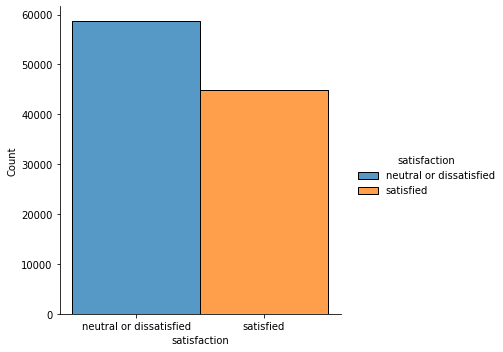

In [70]:
#	Are most passengers satisfied, dissatisfied or neutral in general for the airline? 
sns.displot(data=df, x="satisfaction", hue="satisfaction", multiple="stack");

In [95]:
#Q1: What is the most preferred class of travel for customers traveling ?
df['Type_of_Travel'].nunique()


2

In [72]:
df['Type_of_Travel'].unique()


array(['Personal Travel', 'Business travel'], dtype=object)

In [73]:
df['Type_of_Travel'].value_counts()


Business travel    71465
Personal Travel    32129
Name: Type_of_Travel, dtype: int64

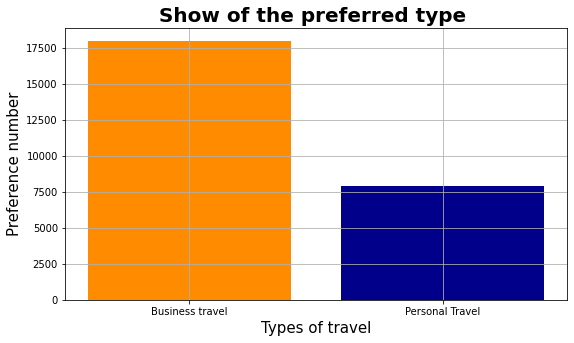

In [74]:
plt.figure(figsize=[9,5])
type_of_travel=['Business travel','Personal Travel']
very_frq=[17980,7913] # business and personal travel 
plt.grid()
plt.bar(type_of_travel,very_frq,color=['darkorange','darkblue']);
plt.xlabel('Types of travel',fontsize = 15)
plt.ylabel('Preference number',fontsize = 15);
plt.title('Show of the preferred type ',fontsize = 20, family = 'cursive' ,weight = 'bold');


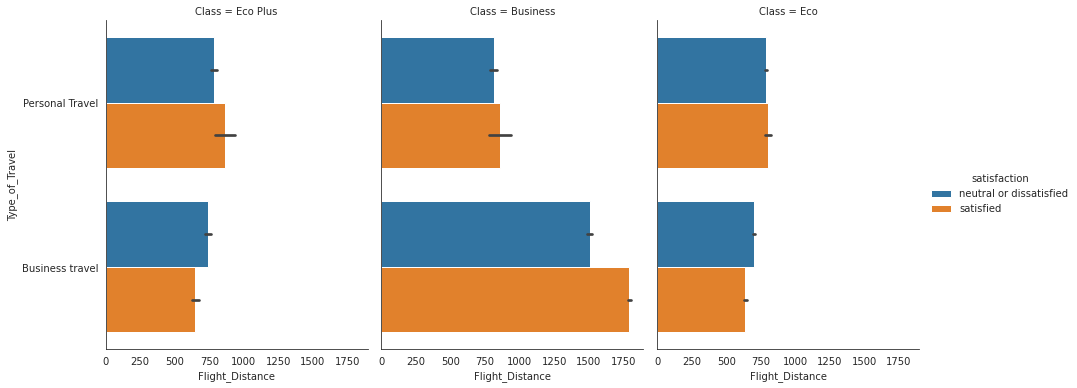

In [75]:
# What type of class was more satisfied passengers?
# depends on type of travle and flight distance

with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=df, kind="bar", height=5.5, aspect=.8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



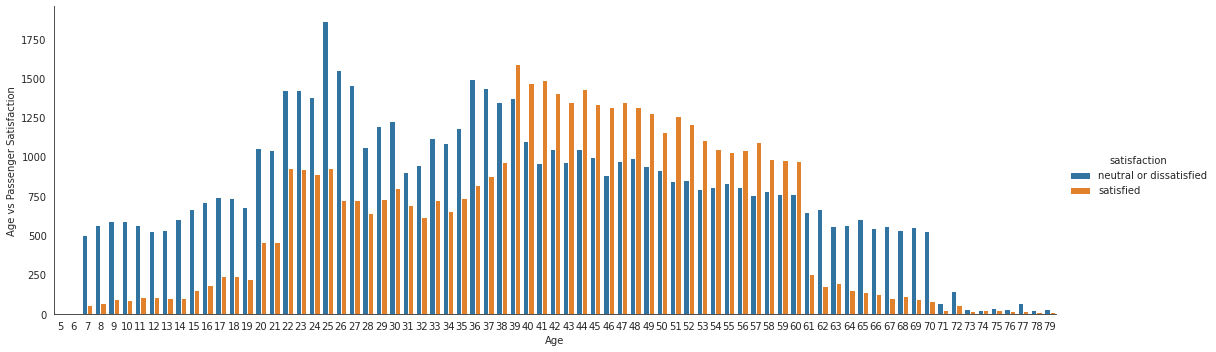

In [76]:
# What age group was more satisfied with the aireline service? 

with sns.axes_style('white'):
    g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80));
    g.set_ylabels('Age vs Passenger Satisfaction');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



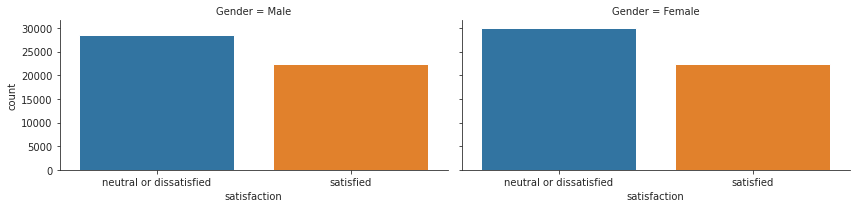

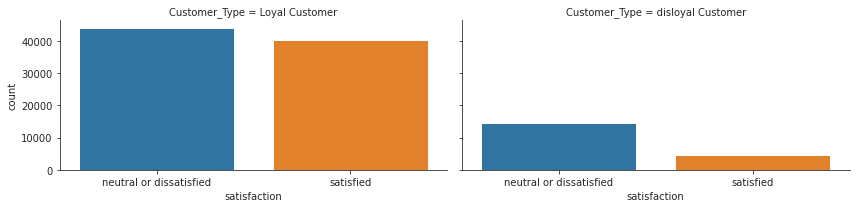

In [77]:
# satisfied passengers were more in wihch class loyal customers or disloyal customers ?
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=3.0, aspect=2.0);  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=df, kind="count", height=3.0, aspect=2.0);


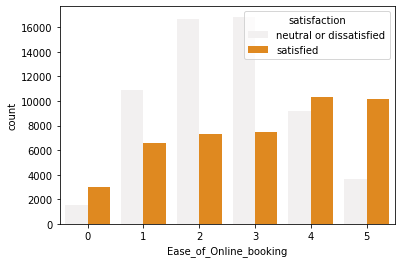

In [79]:
sns.countplot(x='Ease_of_Online_booking',hue="satisfaction",data=df,color="darkorange");

In [80]:
df.Age.min()

7

In [81]:
df.Age.max()

85

In [82]:
# corrlation 
df.corr() #as matrix 

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Age,1.000000,0.099838,0.017470,0.038038,0.024461,-0.001558,0.022920,0.208681,0.160302,0.076380,0.057123,0.040498,-0.047619,0.035003,-0.049899,0.053493,-0.010150,-0.012147
Flight_Distance,0.099838,1.000000,0.007050,-0.019908,0.065697,0.004732,0.056957,0.215191,0.157517,0.128645,0.109540,0.133839,0.063222,0.073224,0.057430,0.093121,0.001906,-0.002426
Inflight_wifi_service,0.017470,0.007050,1.000000,0.343758,0.715848,0.336127,0.134603,0.457002,0.122617,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,-0.017451,-0.019095
Departure/Arrival_time_convenient,0.038038,-0.019908,0.343758,1.000000,0.437021,0.444601,0.005189,0.069990,0.011416,-0.004683,0.068604,0.012461,0.071901,0.093329,0.073227,0.014337,0.000791,-0.000864
Ease_of_Online_booking,0.024461,0.065697,0.715848,0.437021,1.000000,0.458746,0.031940,0.404093,0.030021,0.047185,0.038759,0.107431,0.038851,0.010957,0.035330,0.016192,-0.006292,-0.007984
Gate_location,-0.001558,0.004732,0.336127,0.444601,0.458746,1.000000,-0.001170,0.001451,0.003383,0.003564,-0.028532,-0.005868,0.002421,-0.035451,0.001742,-0.004015,0.005533,0.005143
Food_and_drink,0.022920,0.056957,0.134603,0.005189,0.031940,-0.001170,1.000000,0.234492,0.574561,0.622374,0.058999,0.032415,0.034811,0.087055,0.034077,0.657648,-0.029983,-0.032524
Online_boarding,0.208681,0.215191,0.457002,0.069990,0.404093,0.001451,0.234492,1.000000,0.420067,0.285194,0.155345,0.123780,0.083299,0.204208,0.074390,0.331498,-0.018515,-0.021949
Seat_comfort,0.160302,0.157517,0.122617,0.011416,0.030021,0.003383,0.574561,0.420067,1.000000,0.610614,0.132030,0.105447,0.074553,0.191545,0.069193,0.678478,-0.027323,-0.029900
Inflight_entertainment,0.076380,0.128645,0.209513,-0.004683,0.047185,0.003564,0.622374,0.285194,0.610614,1.000000,0.420352,0.299850,0.378361,0.120812,0.405247,0.691735,-0.027691,-0.030703


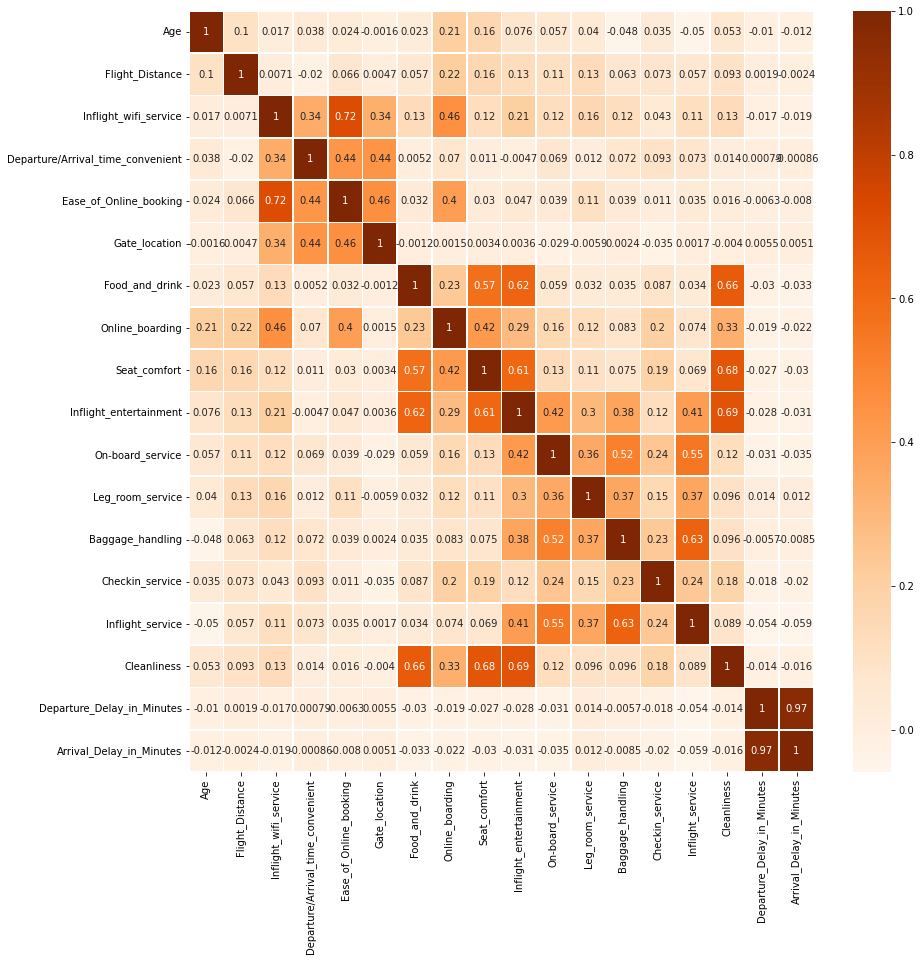

In [83]:
#corrlation  
plt.figure(figsize = (14,14)) 
sns.heatmap(df.corr(),linewidths=0.6, annot = True, cmap = "Oranges"); # as heatmap 


In [84]:
df.Gender.value_counts()

Female    52576
Male      51018
Name: Gender, dtype: int64

In [85]:
df.satisfaction.value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

In [86]:
#Q2: Are customers satisfied with the Wi-Fi service of the airline on which their flights are booked ? 
df['Inflight_wifi_service'].value_counts() 

3    25789
2    25755
4    19737
1    17781
5    11436
0     3096
Name: Inflight_wifi_service, dtype: int64

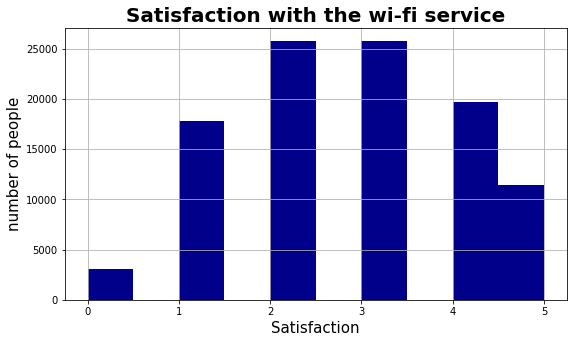

In [87]:
plt.figure(figsize=[9,5])
plt.grid()
plt.xlabel('Satisfaction',fontsize = 15)
plt.ylabel('number of people',fontsize = 15);
plt.title('Satisfaction with the wi-fi service',fontsize = 20, weight = 'bold');
plt.hist(df['Inflight_wifi_service'], color= 'darkblue');

In [88]:
#Q3:Are the most passengers find booking online easy or complicated?
df['Ease_of_Online_booking'].value_counts()

3    24370
2    23962
4    19508
1    17466
5    13815
0     4473
Name: Ease_of_Online_booking, dtype: int64

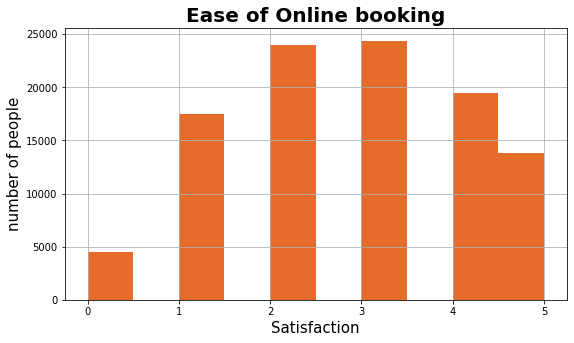

In [89]:
plt.figure(figsize=[9,5])
plt.grid()
plt.xlabel('Satisfaction',fontsize = 15)
plt.ylabel('number of people',fontsize = 15);
plt.title('Ease of Online booking',fontsize = 20, weight = 'bold');
plt.hist(df['Ease_of_Online_booking'], color='#E66C2C');

In [90]:
# How many males and females were loyal customers ?
df['Customer_Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [91]:
df.groupby('Customer_Type').Gender.value_counts()

Customer_Type      Gender
Loyal Customer     Female    42336
                   Male      42326
disloyal Customer  Female    10240
                   Male       8692
Name: Gender, dtype: int64

In [92]:
#
df1= df[(df.Customer_Type=='Loyal Customer')]
df2= df[(df.Customer_Type=='disloyal Customer')]

In [93]:
df1

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103896,Male,Loyal Customer,57,Business travel,Eco,867,4,5,5,5,4,4,4,4,3,4,3,1,3,4,0,0.0,neutral or dissatisfied
103897,Female,Loyal Customer,60,Business travel,Business,1599,5,5,5,5,5,5,4,4,4,4,4,4,4,4,9,7.0,satisfied
103898,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,4,2,3,2,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied


In [94]:
df2

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied
10,Female,disloyal Customer,24,Business travel,Eco,1182,4,5,5,4,2,5,2,2,3,3,5,3,5,2,0,0.0,neutral or dissatisfied
15,Male,disloyal Customer,13,Business travel,Eco,486,2,1,2,3,4,2,1,4,2,1,4,1,3,4,1,0.0,neutral or dissatisfied
24,Female,disloyal Customer,23,Business travel,Eco,452,5,0,5,1,1,5,1,1,4,5,5,3,5,1,54,44.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103892,Female,disloyal Customer,37,Business travel,Business,596,3,3,3,4,3,3,3,3,1,1,3,1,4,3,110,121.0,neutral or dissatisfied
103895,Female,disloyal Customer,24,Business travel,Eco,1055,1,1,1,2,1,1,1,1,3,3,5,5,4,1,13,10.0,neutral or dissatisfied
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
